### 0-0 import library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv("체질검사.csv")

In [3]:
df_raw.head(5)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### step 1. Data composition

In [4]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [24]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 2)

print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}\n".format(df_test_y.shape))

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(gb_uncustomized.score(df_test_x, df_test_y)))

Train data X size	: (176, 13)
Train data Y size	: (176,)
Test data X size	: (76, 13)
Test data Y size	: (76,)

Score on training set:	0.977
Score on test set:	0.718


In [25]:
train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.696,0.608
1,20,0.832,0.697
2,30,0.886,0.717
3,40,0.913,0.731
4,50,0.931,0.727
5,60,0.944,0.729
6,70,0.957,0.727
7,80,0.965,0.725
8,90,0.971,0.721
9,100,0.977,0.717


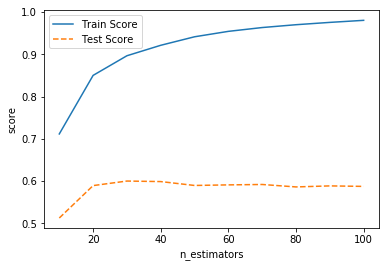

In [11]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [26]:
train_score = []; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = v_min_samples_leaf, 
                                   random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.977,0.717
1,2,0.976,0.712
2,3,0.975,0.705
3,4,0.973,0.696
4,5,0.969,0.691
5,6,0.964,0.697
6,7,0.962,0.697
7,8,0.961,0.692
8,9,0.955,0.695
9,10,0.948,0.699


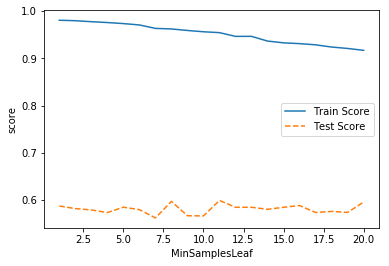

In [13]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesLeaf")
plt.legend()

In [29]:
train_score = []; test_score=[]

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = v_min_samples_split, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.929,0.719
1,6,0.929,0.719
2,8,0.929,0.719
3,10,0.929,0.719
4,12,0.929,0.719
5,14,0.929,0.719
6,16,0.929,0.719
7,18,0.929,0.719
8,20,0.929,0.719
9,22,0.929,0.719


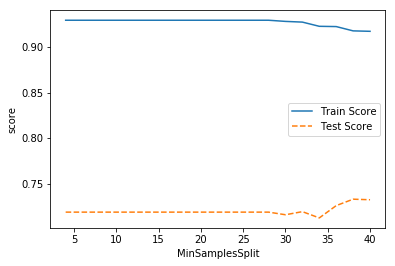

In [30]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesSplit")
plt.legend()

In [32]:
train_score = []; test_score=[]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = 38, max_depth = v_max_depth, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.776,0.734
1,2,0.869,0.737
2,3,0.918,0.733
3,4,0.939,0.709
4,5,0.953,0.710
5,6,0.956,0.718
6,7,0.961,0.716
7,8,0.960,0.696
8,9,0.960,0.696
9,10,0.960,0.696


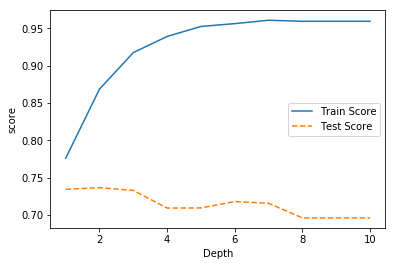

In [33]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Depth")
plt.legend()

In [45]:
train_score = []; test_score=[]

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = 38, max_depth = 3, learning_rate = v_learning_rate, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Late"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,Learning Late,TrainScore,TestScore
0,0.1,0.918,0.733
1,0.2,0.956,0.730
2,0.3,0.976,0.707
3,0.4,0.986,0.705
4,0.5,0.990,0.699
5,0.6,0.993,0.641
6,0.7,0.996,0.533
7,0.8,0.997,0.585
8,0.9,0.998,0.507


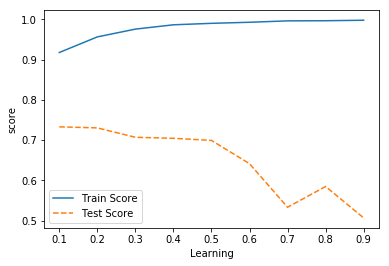

In [46]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Learning")
plt.legend()

In [47]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = 38, max_depth = 3,learning_rate = 0.2, random_state = 2)

gb_final.fit(df_train_x, df_train_y)
print("Score on trainig set\t: %.3f" % gb_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % gb_final.score(df_test_x, df_test_y))

gb_final

Score on trainig set	: 0.956
Score on test set	: 0.730


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=14,
             min_samples_split=38, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
estimator = GradientBoostingRegressor()

param_grid = {"criterion":["mse", "friedman_mse", "mae"], "max_features":["auto", "sqrt", "log2"],
             "max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("Best estimator model \n{}".format(grid_dt.best_estimator_))
print("\nBest parameter: \n{}".format(grid_dt.best_params_))

print("\nBest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model 
GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=30,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Best parameter: 
{'criterion': 'mse', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30}

Best score: 
0.646


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Decision tree\tMAE: {:.3f}".format(mean_absolute_error(df_test_y, gb_final.predict(df_test_x))))
print("Decision tree\tMSE: {:.3f}".format(mean_squared_error(df_test_y, gb_final.predict(df_test_x))))

In [41]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 10, 
                               min_samples_split = 30, max_depth = 2, random_state = 2)

gb_final.fit(df_train_x, df_train_y)
print("Score on trainig set\t: %.3f" % gb_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % gb_final.score(df_test_x, df_test_y))

gb_final

Score on trainig set	: 0.895
Score on test set	: 0.735


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=30, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)